<function matplotlib.pyplot.show(close=None, block=None)>

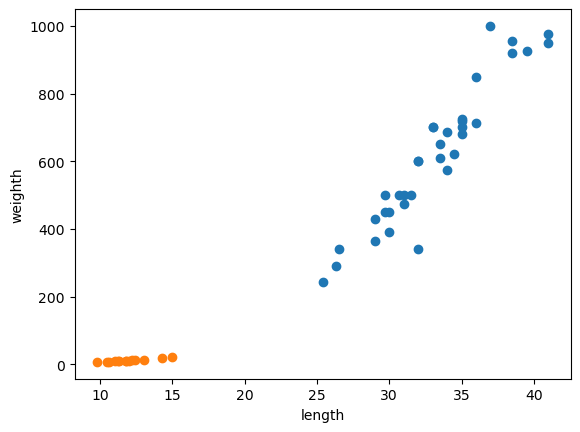

In [ ]:
#### chapter1-3  마켓과 머신러닝 ####
######## 생선 분류 문제 #############

#도미 데이터 준비하기 (도미의 특징을 길이와 무게로 표한한 것, 이런 특징을 특성(feature)이라함:특성은 데이터의 특징)

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#빙어 데이터 준비하기
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]



import matplotlib.pyplot as plt

plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.xlabel('length')
plt.ylabel('weighth')
plt.show

In [ ]:
# 첫 번째 머신러닝 프로그램 : K-Nearest Neighbors (K-최근접 이웃 알고리즘) 

# 1. 도미와 빙어의 데이터를 하나의 데이터로 합침: 두 리스트 데이터를 더 하면 하나의 리스트로  만들어줌
length=bream_length+smelt_length
weight=bream_weight+smelt_weight

# 2. 사이킷런(scikit-learn) 머신러닝 패키지를 사용하려면 각 특성의 리스트를 세로방향으로 늘어뜨린 2차원 리스트를 만들어야함
fish_data=[[l,w] for l, w in zip(length, weight)] #함수 zip: 나열된 리스트 각각에서 하나씩 원소를 꺼내 반환 
                                                  #for문 :zip 함수에서 원소를 꺼내 l과 w에 할당
print(fish_data) #이렇게 생성된 리스트를 2차원 리스트 or 리스트의 리스트라고 부름

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
# 3. 이진분류:정답(도미)에 1(positive class), 나머지(빙어)에 0(negative class) 할당. 곱셈 연산자를 할당하여 리스트를 간단하게 반복시킴
fish_target=[1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# K-최근접 이웃 알고리즘: 클래스 KNeighnorsClassifier을 import 

from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier 클래스의 객체 생성
kn=KNeighborsClassifier()            #참고하는 기본 데이터 값은 5, n_neighbors 매개변수로 변경가능 (kn=KNeighborsClassifier(n_neighbors=49))
kn.fit(fish_data,fish_target)        #fit() method는 주어진 데이터로 알고리즘 훈련
kn.score(fish_data,fish_target)      #score() method는 사이킷런에서 모델을 평가함. 0~1사의 값 반환하며 1은 모든 데이터를 정확하게 맞춤을 의미
kn.predict([[30,600]])               #predict() method는 새로운 데이터의 정답을 예측(리스트의 리스트를 전달해야함,리스트로 두번감쌈)


array([1])

In [ ]:
print(kn._fit_X)     #우리가 전달한 fish_data
print(kn._y)         #우리가 전달한 fish_target

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
kn49=KNeighborsClassifier(n_neighbors=49)    #참고 데이터를 49개로 한 kn49 모델:
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target)
#print(35/49)

0.7142857142857143